# Error vs flow velocity: ELM, SWIM, ELM-ODE, SWIM-ODE

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.rcsetup 
import matplotlib.pyplot as plt
import json

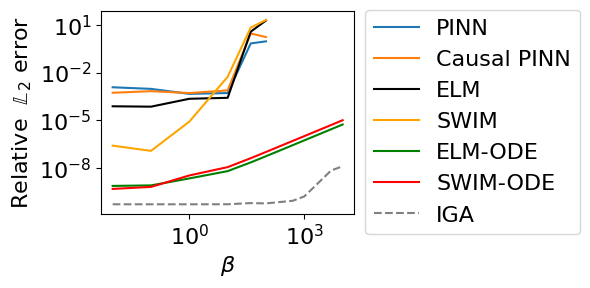

In [31]:
# Load appropriate data files
ode_swim_elm = np.load('adv_ode_swim_elm_rel_l2.npy')
no_ode_swim_elm = np.load('adv_swim_elm_rel_l2.npy')

# load data for iga
def parse_json(filename: str) -> dict:
    with open(filename) as f:
        content = json.load(f)
    return content
iga = parse_json("advection_periodic_list_beta.json")

#PINN
beta = [0.01, 0.1, 1, 10, 40, 100]
PINN_err = [0.0012, 0.00095, 0.00046, 0.00052, 0.69, 0.93]
CPINN_err = [0.00054, 0.00068, 0.00052, 0.00076, 2.92, 1.74]

# Figure parameters
fontsize = 16
rc_fonts = {
    "text.usetex": False,
}
plt.rcParams.update(rc_fonts)

#PINN
beta = [0.01, 0.1, 1, 10, 40, 100]
PINN_err = [0.0012, 0.00095, 0.00046, 0.00052, 0.69, 0.93]
CPINN_err = [0.00054, 0.00068, 0.00052, 0.00076, 2.92, 1.74]

#  Visualiza errors vs convection coefficient
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax = plt.gca()
ax.loglog(beta, PINN_err, label="PINN")
ax.loglog(beta, CPINN_err, label="Causal PINN")
ax.loglog(no_ode_swim_elm[:, 0], no_ode_swim_elm[:, 1], label='ELM', c='k')
ax.loglog(no_ode_swim_elm[:, 0], no_ode_swim_elm[:, 2], label='SWIM', c='orange')
ax.loglog(ode_swim_elm[1:, 0], ode_swim_elm[1:, 1], label='ELM-ODE', c='green')
ax.loglog(ode_swim_elm[1:, 0], ode_swim_elm[1:, 2], label='SWIM-ODE', c='red')
ax.loglog(iga["beta"], iga["relative_l2"], label="IGA", c='gray', linestyle='--')


plt.xlabel(r'$\beta$', fontsize=fontsize)
plt.ylabel(r'Relative  ' + r'$\mathbb{L}_{2}$ ' + r'error', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
ax.legend(fontsize=fontsize, frameon=False, loc='upper right', ncol=2)
plt.legend(bbox_to_anchor=(1, 1.06), loc='upper left',fontsize=fontsize,)
fig.tight_layout()
plt.savefig('advection_errors.pdf', bbox_inches='tight')
